<a href="https://colab.research.google.com/github/luf5/ImersaoDados/blob/main/Imers%C3%A3oDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imersão Dados 4**

Imersão dados, um projeto da Alura, incentiva qualquer um começar sua carreira em data science. Durante uma semana são disponibilizados gratuitamente 5 vídeos com professores, os quais atuam nesta esfera, para ensinar o básico, e também algumas coisas mais avançadas sobre esta área. A imersão 4 ocorreu do dia 23 ao dia 27 de maio em 2022.



Bibliotecas utilizadas:


*   pandas as pd
*   seaborn as sns
*   matplotlib.pyplot as plt
*   numpy as np
*   sklearn.linear_model / sklearn.model_selection 

Comandos mais usados e suas funções:

*   .read_csv() --> lê o arquivo para uma var

*   .head() --> mostra os dados //padrão são 5 linhas e todas colunas
*   .sample() --> mostra uma linha aleatória
*   .info() --> mostra as informações
*   .mean() --> calcula a média
*   .value_counts() --> conta a quantidade de dados com a mesma informação
*   .split() --> separa os valores de uma string
*   .groupby() --> agrupa por coluna
*   .unique() --> mostra quantos valores únicos existem
*   .astype() --> converte pro tipo desejado, se possível
*   .describe() --> mostra mean, mediana, min, max , 25%, 50%, 75%, std, count
*   .loc["nome"] --> localiza o que for informado
*   .reset_index() --> faz com que o índice não seja o elemento selecionado no groupby(), voltando a ser 0, 1, 2, ...
*   .query() --> procura na tabela. Se valores procurados forem uma lista tem que passar o parâmetro dentro de "" e com @ na frente, por exemplo: .query("Bairro in @top_bairros") vai procurar os dados dentro do array top_bairros na coluna Bairro
*  .dropna() --> depende dos parâmetros, mas exclui rows/columns que tem informações faltando em uma/todas células 
*   .merge --> consegue juntar duas bases 




# Organizando e interpretando os dados iniciais

Aprendendo as principais funções para trabalhar com o DF e seus comportamentos. Também são criados alguns gráficos simples para entender como funcionam.

In [258]:
import pandas as pd

In [259]:
data = pd.read_csv("https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv")
data.head(3)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000


In [260]:
data.sample(2)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
674,Rua Maestro Jordão Bernardino de Sene,Granja Julieta,São Paulo,323,3,2,6,R$ 2.500.000
9634,Rua Chiquiais,Parque Vitória,São Paulo,135,3,4,3,R$ 750.000


In [261]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [262]:
data["Bairro"][2] #selecionando um dado

'Jardim Reimberg'

In [263]:
#data["Metragem"].mean(), mas outra forma de selecionar a coluna é usando .nome_coluna
data.Metragem.mean()

442.30065947242207

In [264]:
sum(data["Bairro"] == "Vila Mariana") #somando quantos dados tem o campo bairro como vila mariana

184

In [265]:
imvs_vm = data["Bairro"] == "Vila Mariana" #colocando a matriz de True os false em uma var

In [266]:
imvs_VilaMariana = data[imvs_vm]
#colocamos a matriz de True e False no DF inicial e assim serão retornados so as linhas que têm True, ou seja, Vila Mariana como bairro
#estas dados foram colocados em imvs_VilaMariana
imvs_VilaMariana

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [267]:
imvs_VilaMariana["Metragem"].mean()

233.6195652173913

In [268]:
n_imvs_bairro = data["Bairro"].value_counts()

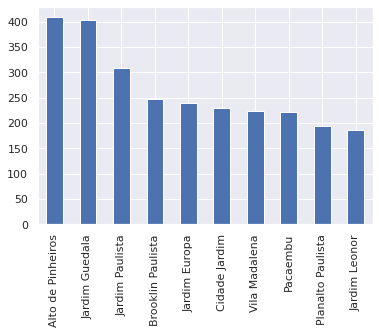

In [269]:
#plotando um gráfico dos 10 bairros com mais imóveis
n_imvs_bairro.head(10).plot.bar()

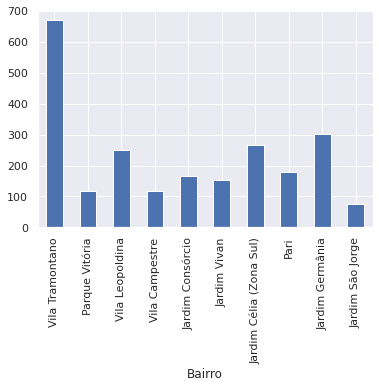

In [270]:
bairros = data.groupby(["Bairro"]) #separando os dados por bairros e atribuindo a var bairros
bairros["Metragem"].mean().sample(10).plot.bar() #plotando a média da metragem de 10 bairros random

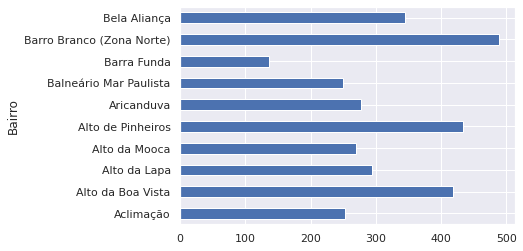

In [271]:
bairros["Metragem"].mean().head(10).plot.barh() 
#plotando outro tipo de gráfico para conhecer. Tbm exitem outros, como line e box

In [272]:
bairro_rua_nada = data[data["Rua"].isnull()] 
bairro_rua_nada["Bairro"].value_counts()
#vendo a quantidade de dados de rua não preenchidos em cada bairro

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

In [273]:
data["Valor"][0].split() 

['R$', '7.000.000']

In [274]:
data["Valor"].str.split(expand = True) #Usa o split com expand = True para gerar um DF com todos arrays da DF principal

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [275]:
data["Valor"].str.split(expand = True)[0].unique()
#Unique está testando se a 1 coluna (0) tem só valores iguais, para saber se todos são R$

array(['R$'], dtype=object)

In [276]:
data["Valor"].str.split(expand = True)[2].unique()
#Vendo, como antes, se não serão apagados valores úteis

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [277]:
data[["Moeda", "Valor_Anuncio", "Tipo_Anuncio"]] = data["Valor"].str.split(expand = True)
data.head()
#adicionando a coluna com os dados separados no DF

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [278]:
data_vendas = data[data["Tipo_Anuncio"].isnull()]
#separando so os dados que não tem tipo de anuncio, porque logicamente estes são de alugéis

In [279]:
data_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [280]:
data_vendas["Valor_Anuncio_Float"] = data_vendas["Valor_Anuncio"].str.replace(".", "").astype(float)
#trocando as , por . (padrão americano aceito pelo python) e convertendo para float

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
pd.set_option("display.precision", 2)
pd.set_option("display.float_format", lambda x: '%.2f' % x)
#arrumando as configurações do pandas para viazualizar o DF melhor

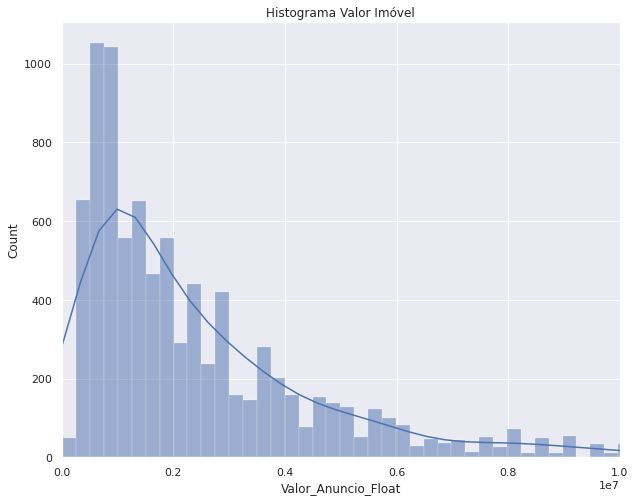

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = data_vendas, x = "Valor_Anuncio_Float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

In [283]:
data_vendas["Valor_Milhão"] = data_vendas["Valor_Anuncio_Float"]/1000000
#adicionando uma coluna do valor em milhão

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


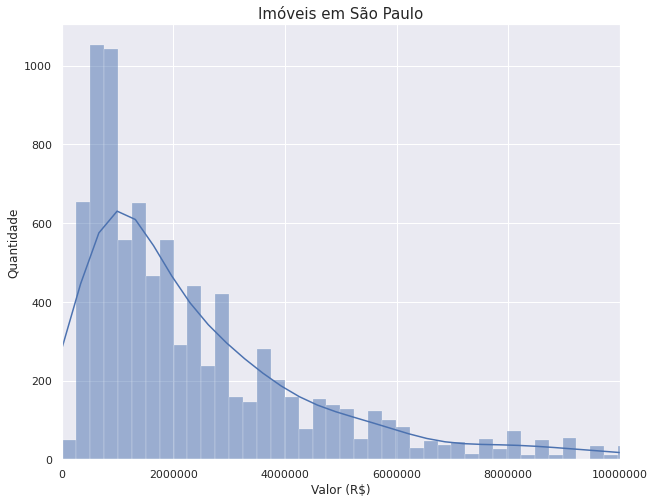

In [284]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = data_vendas, x = "Valor_Anuncio_Float", kde = True)
ax.set_title("Imóveis em São Paulo", size=15)
ax.set(xlabel = "Valor (R$)", ylabel = "Quantidade")
plt.xlim((-100, 10000000))
plt.ticklabel_format(style='plain', axis='x')
plt.show()
#Aprendendo como melhorar gráfico anterior, mais user friendly

In [285]:
data_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_Milhão
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54


In [286]:
bairros = data_vendas.groupby(["Bairro"]).sum().reset_index() 
#bairros (sobrescrevendo o anterior) recebe um DF de data_vendas agrupado por bairro
bairros["valor_metro2_bairro"] = bairros["Valor_Anuncio_Float"] / bairros["Metragem"]
#calculando o valor do metro2 por bairro

In [287]:
bairros.head()

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_Anuncio_Float,Valor_Milhão,valor_metro2_bairro
0,Aclimação,19447,258,240,230,139292801.00,139.29,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,19.13,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,166.65,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,23.68,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,1764.82,11126.34


[Text(0, 0.5, 'Bairro'), Text(0.5, 0, 'Valor (R$)')]

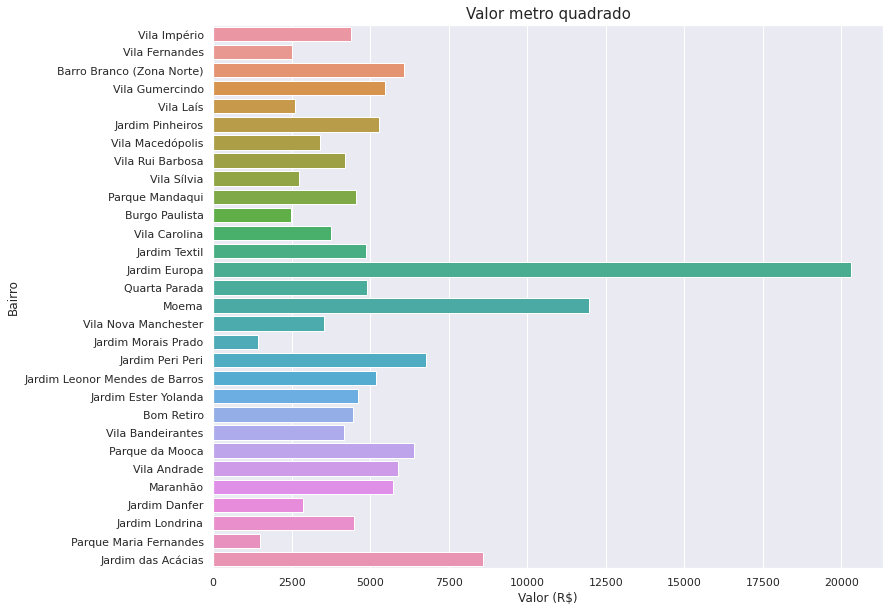

In [288]:
sns.set()
plt.figure(figsize=(12, 10))
ax = sns.barplot(data = bairros.sample(30), x = "valor_metro2_bairro", y = "Bairro")
ax.set_title("Valor metro quadrado", size=15)
ax.set(xlabel = "Valor (R$)", ylabel = "Bairro")
#plotando um gráfico diferente para aprender a configurar

# Juntando mais dados para melhores análises

São juntados dois DF por meio de outros DF e bibliotecas de geometria, para que as análises sejam melhores e possuam  outras correlações, visto que as mesmas conterão mais elementos ápos juntar os dados de vendas e os dados do IBGE.

In [289]:
url_ibge = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
data_ibge = pd.read_csv(url_ibge, sep=";", encoding='ISO-8859-1', thousands=".", decimal=",")
#mudança no encoding, sep (separador do arquivo csv para ;)
data_ibge.dropna(how="all", axis=1, inplace=True)
#tirando os valores NaN. inplace=True faz com que a DF mude para a DF sem os dados NaN 
data_ibge.head()

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [290]:
data_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [291]:
data_ibge["Nome_do_bairro"].unique()
#vendo como seria possivel juntar estes dados com o outro DF

array(['Sï¿½O PAULO (todos os setores)'], dtype=object)

In [292]:
enderecos = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ID/enderecos.csv")
#puxando outro DF para poder ajudar a juntar o data_vendas com o data_ibge

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [293]:
enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113886 entries, 0 to 1113885
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   tipo_logr        1113559 non-null  object 
 1   logr_nome        1113566 non-null  object 
 2   logr_compl       1113567 non-null  object 
 3   numero           28810 non-null    object 
 4   bairro           1113546 non-null  object 
 5   nome_localidade  1093788 non-null  object 
 6   sigla_uf         1093788 non-null  object 
 7   cep              1093788 non-null  float64
 8   latitude         1090660 non-null  float64
 9   longitude        1090660 non-null  float64
dtypes: float64(3), object(7)
memory usage: 85.0+ MB


In [294]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
#como vamos usar só os dados de SP estamos buscando por somente eles
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [295]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
#juntando rua com o nome da rua, porque neste DF estão separados e os colocando em uma coluna nomeada de rua
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip()
#fazendo com que todos caracteres da coluna rua fiquem minúsculos
enderecos_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [296]:
data_vendas["Rua"]
#analisando como está o nome da rua no DF data_vendas

0                 Avenida Itacira, 255 
1        Rua Aurelia Perez Alvarez, 42 
2                       Rua Alba Valdez
3                                   NaN
4              Rua Tobias Barreto, 195 
                      ...              
10002                     Avenida Odila
10003                        Rua Tapuçu
10004                     Rua Guararema
10005                 Rua Estero Belaco
10007        Rua Barão de Tramandaí, 0 
Name: Rua, Length: 9156, dtype: object

In [297]:
data_vendas["apenas_rua"] = data_vendas["Rua"].str.extract(r'(^[\w ]+)')
#função um pouco mais difícil, mas que vai pegar somente o nome da rua, tirando o número
#depois adiciona na coluna apenas_rua
data_vendas["apenas_rua"] = data_vendas["apenas_rua"].str.lower().str.strip()
#fazendo com que todos caracteres da coluna apenas_rua fiquem minúsculos e sem espaços nos lados
data_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_Milhão,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,rua tobias barreto


In [298]:
data_geo = pd.merge(left = data_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=data_vendas.columns).query("cep > 0")
#juntando o DF data_vendas com enderecos_sp(apenas as colunas ["rua", "cep", "latitude", "longitude", por meio do data_vendas["apenas_rua"] e enderecos_sp["rua"] que forem iguais ou seja, caso os campos apenas_rua e rua sejam iguais as colunas serão adicionadas
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_Milhão,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,1.50,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,0.67,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,2.30,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,1.05,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


## Parte relacionada a geometria

Está parte é bem mais complexa, difícil para um curso introdutório, mas os professores acharam interessante mostrar como em alguns momentos existe uma certa dificuldade em juntar DF que foram criados com diferentes propostas.

In [299]:
data_ibge.info()
#analisando a melhor forma de juntar os dados do ibge com dados_vendas 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cod_setor              18363 non-null  int64  
 1   Cod_Grandes Regiï¿½es  18363 non-null  int64  
 2   Nome_Grande_Regiao     18363 non-null  object 
 3   Cod_UF                 18363 non-null  int64  
 4   Nome_da_UF             18363 non-null  object 
 5   Cod_meso               18363 non-null  int64  
 6   Nome_da_meso           18363 non-null  object 
 7   Cod_micro              18363 non-null  int64  
 8   Nome_da_micro          18363 non-null  object 
 9   Cod_RM                 18363 non-null  int64  
 10  Nome_da_RM             18363 non-null  object 
 11  Cod_municipio          18363 non-null  int64  
 12  Nome_do_municipio      18363 non-null  object 
 13  Cod_distrito           18363 non-null  int64  
 14  Nome_do_distrito       18363 non-null  object 
 15  Co

In [300]:
!pip install geopandas
#! roda na linha de comando

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [301]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

In [302]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/ID/35SEE250GC_SIR.shp")
#.shp são dados geoespaciais e o geopandas consegue interpretá-los
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [303]:
setor_censo_sp = setor_censo[setor_censo["NM_MUNICIP"] == "SÃO PAULO"]
#pegando somente os dados de SP que estão no DF
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))]
#como o .shp contém dados geométricos em forma de polígonos pode-se testar se uma determinada latitude e longitude estão dentro deste polígono
#no exemplo de cima foi pego a latitude e longitude de uma rua no bairro Vila Mariana para testar

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


In [304]:
data_geo.head(2)
#data_geo tem os dados que adicionamos de lat e long, o que ajudará a juntar os DF

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_Milhão,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69


In [305]:
data_geo["Point"] = ""
#cria a coluna point vazia em data_geo


for i in data_geo.index:
    data_geo["Point"][i] = Point(data_geo["longitude"][i], data_geo["latitude"][i])
#para cada index de data_geo foi criado um ponto com a lat e long e adicionado a coluna point


data_geo['setor_censo'] = data_geo["Point"][:10].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
#testa se o valor da coluna point está dentro do polígono do DF setor_censo_sp e se isto resulta em True adiciona o valor do CD_GEOCODI (que está no DF setor_censo_sp e é o mesmo codigo do DF do IBGE) no DF data_geo

data_geo.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_Anuncio,Tipo_Anuncio,Valor_Anuncio_Float,Valor_Milhão,apenas_rua,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20,POINT (-46.2013172 -23.975993),NaN
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050


In [306]:
data_geo.drop(columns=["Moeda", "Valor_Anuncio", "Tipo_Anuncio", "apenas_rua"], inplace=True)
#tirando as colunas que não serão utilizadas
data_geo.rename(columns={"Valor_Anuncio_Float": "Valor_Anuncio"}, inplace=True)
#trocando o nome da coluna
data_geo["Valor_m2"] = data_geo["Valor_Anuncio"]/data_geo["Metragem"]
#fazendo o valor do m2
data_geo = data_geo[~data_geo["setor_censo"].isnull()]
#~ inverte os valores de True e False, para que os valores nulos de setor_censo sejam tenham valor False para sobrepor a matriz

In [307]:
data_geo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ID/dados_geo.csv")
#pegando a base tratada pelo professor, com os códigos complexos para o curso introdutório já realizados
data_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,1.50,5617.98,Avenida Odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,0.67,7000.00,Rua Tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,2.30,3801.65,Rua Guararema,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,1.05,5121.95,Rua Estero Belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00


In [308]:
data_vendas_censo = pd.merge(left = data_geo, right = data_ibge, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
#juntando os DF como antes
data_vendas_censo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,...,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,...,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,...,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76,17705032.31,3977.93,21495997.85
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,...,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58,4261814.01,2062.09,4596759.57
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,...,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68,16021825.60,4362.79,16264378.33


In [309]:
data_vendas_censo = data_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
#tirando as colunas que não serão usadas, ou seja, as mesmas não foram escritas e também tirando as linhas com valores faltantes

# Outliers e boxplot

Uma análise básica com gráficos gerados a partir do DF data_vendas_censo e limpeza dos outliers que foram encontrados nos gráficos.

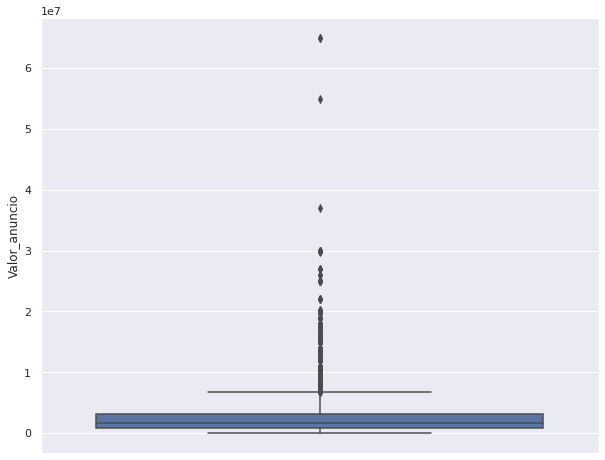

In [310]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = data_vendas_censo, y="Valor_anuncio")
plt.show()
#box plot mostra os outliers e onde estão a maioria dos dados

In [311]:
data_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")
#procurando os imóveis com valor muito alto ou muito baixo, os quais atrapalharão as análises

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


In [312]:
data_vendas_censo.drop(data_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace=True)
#tirando os outliers

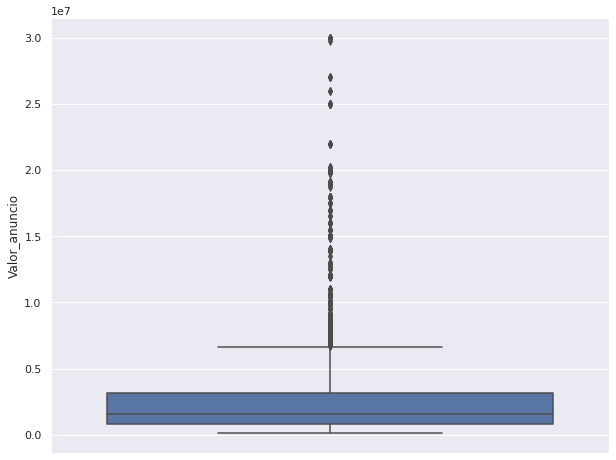

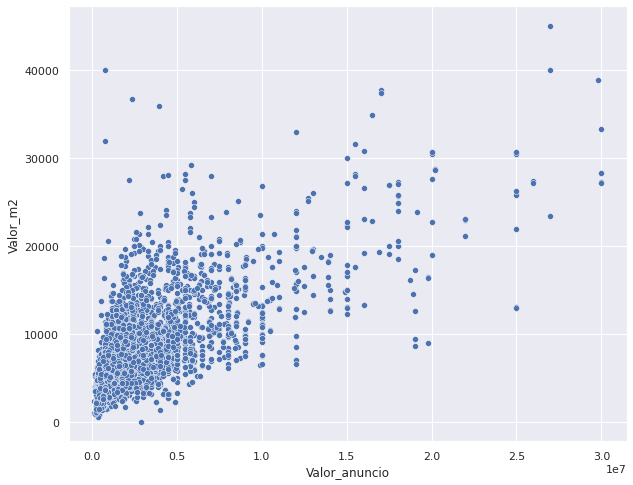

In [313]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = data_vendas_censo, y="Valor_anuncio")
plt.show()
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(data = data_vendas_censo, x="Valor_anuncio", y="Valor_m2")
#vendo como está a distribuição

In [314]:
data_vendas_censo.corr()
#mostra a correlação de um dado com outro, quanto mais perto do 1 mais correlacionado

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


In [315]:
import numpy as np

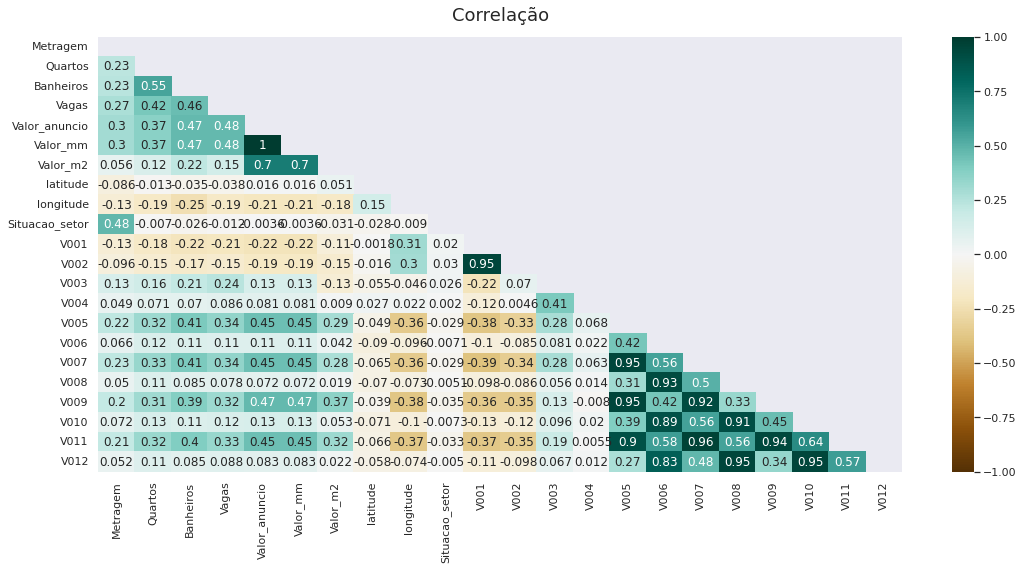

In [316]:
plt.figure(figsize=(18, 8))
mask = np.triu(np.ones_like(data_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(data_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);
#outra forma de ver a correlação

# Uma mostra do que é machine learning

Uma parte bem mais avançada e relacionada com o treinamento de inteligências artificias para predição de modelos.

In [317]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data_vendas_censo[["Metragem"]]
Y = data_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [318]:
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)

In [319]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [320]:
from sklearn.metrics import mean_absolute_error, r2_score

mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [321]:
mean_absolute_error(Y_train, Y_predict_train)

1825220.3034549057

In [322]:
X = data_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]
Y = data_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)
mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [323]:
mae_test

1349590.384432537

In [324]:
mae_train

1362945.691504754

In [325]:
r2_test

0.37745069254620534

In [326]:
r2_train

0.39899592785823335

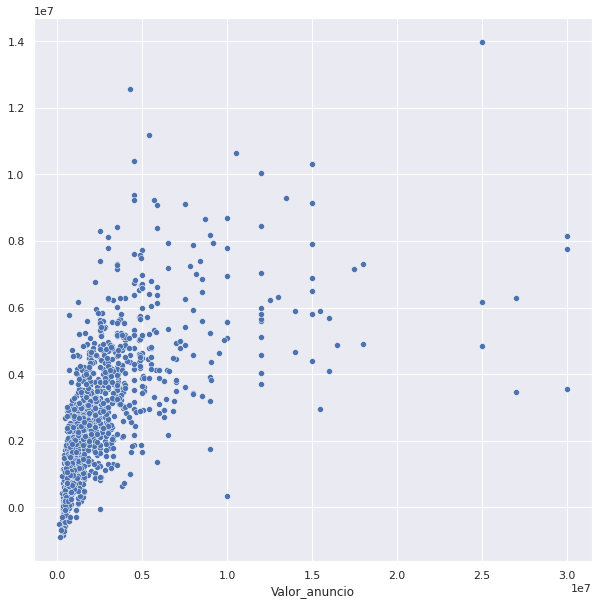

In [327]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)